#### IMPORTING THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Concatenate, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

C:\Users\A.GOWTHAMI\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\A.GOWTHAMI\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\A.GOWTHAMI\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Set random seed for NumPy
np.random.seed(42)

# Set random seed for TensorFlow
tf.random.set_seed(42)

#### IMPORTING THE DATASET

In [3]:
data = pd.read_csv("GestationalDiabetesDataset.csv")

#### READING THE DATASET

In [4]:
data

,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
0,1,22,2,1,NaN,55.0,0,0,0,0,102.0,69,NaN,12.0,0,0,0
1,2,26,2,1,NaN,53.0,0,0,0,0,101.0,63,NaN,12.4,0,0,0
2,3,29,1,0,NaN,50.0,0,0,0,0,118.0,79,NaN,14.3,0,0,0
3,4,28,2,1,NaN,51.0,0,0,0,0,99.0,70,NaN,15.0,0,0,0
4,5,21,2,1,NaN,52.0,0,0,0,0,116.0,65,NaN,15.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,3521,31,4,1,24.1,32.0,0,0,1,0,150.0,107,187.0,13.4,1,1,1
3521,3522,26,3,1,34.5,43.0,1,1,0,1,166.0,85,164.0,14.2,0,0,1
3522,3523,35,2,2,23.6,56.0,1,0,1,0,178.0,81,141.0,15.3,0,1,1
3523,3524,37,2,0,23.3,28.0,1,0,1,1,139.0,115,133.0,13.3,0,1,0


#### EXPLORATORY DATA ANALYSIS

In [5]:
data.head()

,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
0,1,22,2,1,NaN,55.0,0,0,0,0,102.0,69,NaN,12.0,0,0,0
1,2,26,2,1,NaN,53.0,0,0,0,0,101.0,63,NaN,12.4,0,0,0
2,3,29,1,0,NaN,50.0,0,0,0,0,118.0,79,NaN,14.3,0,0,0
3,4,28,2,1,NaN,51.0,0,0,0,0,99.0,70,NaN,15.0,0,0,0
4,5,21,2,1,NaN,52.0,0,0,0,0,116.0,65,NaN,15.0,0,0,0


In [6]:
data.tail()

,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
3520,3521,31,4,1,24.1,32.0,0,0,1,0,150.0,107,187.0,13.4,1,1,1
3521,3522,26,3,1,34.5,43.0,1,1,0,1,166.0,85,164.0,14.2,0,0,1
3522,3523,35,2,2,23.6,56.0,1,0,1,0,178.0,81,141.0,15.3,0,1,1
3523,3524,37,2,0,23.3,28.0,1,0,1,1,139.0,115,133.0,13.3,0,1,0
3524,3525,43,2,0,28.6,30.0,1,1,0,0,121.0,63,179.0,15.8,1,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Case Number                      3525 non-null   int64  
 1   Age                              3525 non-null   int64  
 2   No of Pregnancy                  3525 non-null   int64  
 3   Gestation in previous Pregnancy  3525 non-null   int64  
 4   BMI                              2444 non-null   float64
 5   HDL                              2524 non-null   float64
 6   Family History                   3525 non-null   int64  
 7   unexplained prenetal loss        3525 non-null   int64  
 8   Large Child or Birth Default     3525 non-null   int64  
 9   PCOS                             3525 non-null   int64  
 10  Sys BP                           1820 non-null   float64
 11  Dia BP                           3525 non-null   int64  
 12  OGTT                

In [8]:
data.columns

Index(['Case Number', 'Age', 'No of Pregnancy',
       'Gestation in previous Pregnancy', 'BMI', 'HDL', 'Family History',
       'unexplained prenetal loss', 'Large Child or Birth Default', 'PCOS',
       'Sys BP', 'Dia BP', 'OGTT', 'Hemoglobin', 'Sedentary Lifestyle',
       'Prediabetes', 'Class Label(GDM /Non GDM)'],
      dtype='object')

In [9]:
data.shape

(3525, 17)

In [10]:
data.nunique()

Case Number                        3525
Age                                  26
No of Pregnancy                       4
Gestation in previous Pregnancy       3
BMI                                 272
HDL                                  56
Family History                        2
unexplained prenetal loss             2
Large Child or Birth Default          2
PCOS                                  2
Sys BP                               96
Dia BP                               65
OGTT                                252
Hemoglobin                           88
Sedentary Lifestyle                   2
Prediabetes                           2
Class Label(GDM /Non GDM)             2
dtype: int64

In [11]:
data.count()

Case Number                        3525
Age                                3525
No of Pregnancy                    3525
Gestation in previous Pregnancy    3525
BMI                                2444
HDL                                2524
Family History                     3525
unexplained prenetal loss          3525
Large Child or Birth Default       3525
PCOS                               3525
Sys BP                             1820
Dia BP                             3525
OGTT                               3012
Hemoglobin                         3525
Sedentary Lifestyle                3525
Prediabetes                        3525
Class Label(GDM /Non GDM)          3525
dtype: int64

In [12]:
data.dtypes

Case Number                          int64
Age                                  int64
No of Pregnancy                      int64
Gestation in previous Pregnancy      int64
BMI                                float64
HDL                                float64
Family History                       int64
unexplained prenetal loss            int64
Large Child or Birth Default         int64
PCOS                                 int64
Sys BP                             float64
Dia BP                               int64
OGTT                               float64
Hemoglobin                         float64
Sedentary Lifestyle                  int64
Prediabetes                          int64
Class Label(GDM /Non GDM)            int64
dtype: object

#### STATISTICAL ANALYSIS

In [13]:
data.describe()

,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
count,3525.000000,3525.000000,3525.000000,3525.000000,2444.000000,2524.000000,3525.000000,3525.000000,3525.00000,3525.000000,1820.000000,3525.000000,3012.000000,3525.000000,3525.000000,3525.000000,3525.000000
mean,1763.000000,32.581277,2.076312,0.960851,27.854092,46.471870,0.498156,0.364823,0.35773,0.264681,135.762088,81.538156,170.707503,13.959801,0.449645,0.293050,0.389220
std,1017.724177,6.169107,0.838637,0.722313,5.714737,10.800813,0.500068,0.481449,0.47940,0.441226,22.742844,11.379758,48.160549,1.863969,0.497529,0.455226,0.487643
min,1.000000,20.000000,1.000000,0.000000,13.300000,15.000000,0.000000,0.000000,0.00000,0.000000,90.000000,60.000000,80.000000,8.800000,0.000000,0.000000,0.000000
25%,882.000000,28.000000,1.000000,0.000000,24.400000,42.000000,0.000000,0.000000,0.00000,0.000000,122.000000,74.000000,142.000000,12.700000,0.000000,0.000000,0.000000
50%,1763.000000,32.000000,2.000000,1.000000,27.500000,49.000000,0.000000,0.000000,0.00000,0.000000,132.000000,81.000000,156.000000,14.000000,0.000000,0.000000,0.000000
75%,2644.000000,37.000000,3.000000,1.000000,31.000000,55.000000,1.000000,1.000000,1.00000,1.000000,153.000000,86.000000,195.000000,15.000000,1.000000,1.000000,1.000000
max,3525.000000,45.000000,4.000000,2.000000,45.000000,70.000000,1.000000,1.000000,1.00000,1.000000,185.000000,124.000000,403.000000,18.000000,1.000000,1.000000,1.000000


In [14]:
np.mean(data)

Case Number                        1763.000000
Age                                  32.581277
No of Pregnancy                       2.076312
Gestation in previous Pregnancy       0.960851
BMI                                  27.854092
HDL                                  46.471870
Family History                        0.498156
unexplained prenetal loss             0.364823
Large Child or Birth Default          0.357730
PCOS                                  0.264681
Sys BP                              135.762088
Dia BP                               81.538156
OGTT                                170.707503
Hemoglobin                           13.959801
Sedentary Lifestyle                   0.449645
Prediabetes                           0.293050
Class Label(GDM /Non GDM)             0.389220
dtype: float64

In [15]:
data.median

<bound method NDFrame._add_numeric_operations.<locals>.median of       Case Number  Age  No of Pregnancy  Gestation in previous Pregnancy  \
0               1   22                2                                1   
1               2   26                2                                1   
2               3   29                1                                0   
3               4   28                2                                1   
4               5   21                2                                1   
...           ...  ...              ...                              ...   
3520         3521   31                4                                1   
3521         3522   26                3                                1   
3522         3523   35                2                                2   
3523         3524   37                2                                0   
3524         3525   43                2                                0   

       BMI   HDL  Fami

In [16]:
np.std(data)

Case Number                        1017.579808
Age                                   6.168232
No of Pregnancy                       0.838518
Gestation in previous Pregnancy       0.722210
BMI                                   5.713568
HDL                                  10.798673
Family History                        0.499997
unexplained prenetal loss             0.481380
Large Child or Birth Default          0.479332
PCOS                                  0.441163
Sys BP                               22.736595
Dia BP                               11.378144
OGTT                                 48.152554
Hemoglobin                            1.863704
Sedentary Lifestyle                   0.497458
Prediabetes                           0.455161
Class Label(GDM /Non GDM)             0.487573
dtype: float64

In [17]:
np.var(data)

Case Number                        1.035469e+06
Age                                3.804708e+01
No of Pregnancy                    7.031126e-01
Gestation in previous Pregnancy    5.215879e-01
BMI                                3.264486e+01
HDL                                1.166113e+02
Family History                     2.499966e-01
unexplained prenetal loss          2.317271e-01
Large Child or Birth Default       2.297594e-01
PCOS                               1.946249e-01
Sys BP                             5.169527e+02
Dia BP                             1.294622e+02
OGTT                               2.318668e+03
Hemoglobin                         3.473394e+00
Sedentary Lifestyle                2.474644e-01
Prediabetes                        2.071716e-01
Class Label(GDM /Non GDM)          2.377278e-01
dtype: float64

In [18]:
data.skew()

Case Number                        0.000000
Age                                0.051001
No of Pregnancy                    0.317721
Gestation in previous Pregnancy    0.058879
BMI                                0.524710
HDL                               -0.917954
Family History                     0.007379
unexplained prenetal loss          0.561863
Large Child or Birth Default       0.593868
PCOS                               1.067267
Sys BP                             0.088163
Dia BP                             0.694349
OGTT                               1.495513
Hemoglobin                         0.187769
Sedentary Lifestyle                0.202534
Prediabetes                        0.909737
Class Label(GDM /Non GDM)          0.454608
dtype: float64

In [19]:
data.corr()

,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
Case Number,1.000000,0.389118,0.250554,0.376781,0.698480,-0.507670,0.150812,0.147234,0.365506,0.585108,0.642472,0.517167,0.574109,0.413606,0.047535,0.621281,0.766450
Age,0.389118,1.000000,0.262048,0.327148,0.516200,-0.444572,0.298882,0.183008,0.132220,0.425936,0.619515,0.481878,0.383144,0.288387,0.374130,0.446573,0.446500
No of Pregnancy,0.250554,0.262048,1.000000,0.669666,0.084370,0.011123,0.012854,0.195286,0.295575,0.165494,0.368070,0.144426,0.141241,0.189648,0.275471,0.266970,0.206292
Gestation in previous Pregnancy,0.376781,0.327148,0.669666,1.000000,0.322823,-0.188953,0.189133,0.192041,0.363332,0.336144,0.296984,0.254994,0.430853,0.274386,0.304835,0.513004,0.483954
BMI,0.698480,0.516200,0.084370,0.322823,1.000000,-0.694974,0.622366,0.072771,0.310124,0.489029,0.245677,0.541788,0.758952,0.220607,0.338952,0.524723,0.643999
HDL,-0.507670,-0.444572,0.011123,-0.188953,-0.694974,1.000000,-0.558879,-0.034365,-0.324827,-0.581137,-0.629794,-0.581466,-0.697259,-0.125162,-0.045741,-0.588327,-0.658695
Family History,0.150812,0.298882,0.012854,0.189133,0.622366,-0.558879,1.000000,0.115946,0.151305,0.217634,0.274973,0.481105,0.461652,0.125059,0.367742,0.408126,0.345066
unexplained prenetal loss,0.147234,0.183008,0.195286,0.192041,0.072771,-0.034365,0.115946,1.000000,-0.016034,0.183838,0.196896,0.175423,0.092726,0.012963,0.292324,0.136128,0.224166
Large Child or Birth Default,0.365506,0.132220,0.295575,0.363332,0.310124,-0.324827,0.151305,-0.016034,1.000000,0.413514,0.440776,0.293908,0.365887,0.198790,0.234373,0.355582,0.347396
PCOS,0.585108,0.425936,0.165494,0.336144,0.489029,-0.581137,0.217634,0.183838,0.413514,1.000000,0.625282,0.528135,0.559169,0.358529,0.094986,0.577243,0.693538


In [20]:
data.cov()

,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
Case Number,1.035762e+06,2443.057605,213.848184,276.977582,2816.757184,-5785.857847,76.753121,72.142168,178.329455,262.740352,18498.724967,5989.547957,24044.871637,784.613848,24.068956,287.835982,380.378263
Age,2.443058e+03,38.057879,1.355743,1.457780,19.559143,-28.233861,0.922043,0.543552,0.391036,1.159384,92.600805,33.829262,113.519879,3.316165,1.148319,1.254126,1.343215
No of Pregnancy,2.138482e+02,1.355743,0.703312,0.405656,0.417976,0.095599,0.005390,0.078849,0.118834,0.061237,7.366191,1.378330,5.740958,0.296457,0.114939,0.101921,0.084364
Gestation in previous Pregnancy,2.769776e+02,1.457780,0.405656,0.521736,1.407490,-1.222833,0.068316,0.066784,0.125814,0.107130,5.625880,2.095989,15.021580,0.369425,0.109549,0.168684,0.170463
BMI,2.816757e+03,19.559143,0.417976,1.407490,32.658219,-62.577431,1.775602,0.200345,0.884987,1.357975,25.038261,37.753870,220.161490,2.338050,0.953169,1.481590,1.826601
HDL,-5.785858e+03,-28.233861,0.095599,-1.222833,-62.577431,116.657552,-3.008305,-0.165162,-1.578478,-2.252369,-198.212337,-72.638910,-407.532348,-2.364591,-0.241088,-2.282679,-2.657789
Family History,7.675312e+01,0.922043,0.005390,0.068316,1.775602,-3.008305,0.250068,0.027915,0.036273,0.048019,2.991086,2.737797,11.118133,0.116569,0.091493,0.092907,0.084146
unexplained prenetal loss,7.214217e+01,0.543552,0.078849,0.066784,0.200345,-0.165162,0.027915,0.231793,-0.003701,0.039052,2.196345,0.961104,2.206359,0.011633,0.070022,0.029835,0.052629
Large Child or Birth Default,1.783295e+02,0.391036,0.118834,0.125814,0.884987,-1.578478,0.036273,-0.003701,0.229825,0.087468,4.855137,1.603401,8.694732,0.177636,0.055902,0.077601,0.081213
PCOS,2.627404e+02,1.159384,0.061237,0.107130,1.357975,-2.252369,0.048019,0.039052,0.087468,0.194680,7.039347,2.651788,12.454301,0.294865,0.020852,0.115943,0.149222


#### DATA CLEANING

In [21]:
data.isna().sum()

Case Number                           0
Age                                   0
No of Pregnancy                       0
Gestation in previous Pregnancy       0
BMI                                1081
HDL                                1001
Family History                        0
unexplained prenetal loss             0
Large Child or Birth Default          0
PCOS                                  0
Sys BP                             1705
Dia BP                                0
OGTT                                513
Hemoglobin                            0
Sedentary Lifestyle                   0
Prediabetes                           0
Class Label(GDM /Non GDM)             0
dtype: int64

##### IMPUTING MISSING VALUES

In [22]:
from sklearn.impute import SimpleImputer

# Define the columns to impute
datacolumns = ["BMI","HDL","Sys BP","OGTT"]

# Initialize SimpleImputer with mean strategy for specified columns
imputer_mean = SimpleImputer(strategy='mean')

# Perform mean imputation only on specified columns
data[datacolumns] = imputer_mean.fit_transform(data[datacolumns])

print(data.isna().sum())

Case Number                        0
Age                                0
No of Pregnancy                    0
Gestation in previous Pregnancy    0
BMI                                0
HDL                                0
Family History                     0
unexplained prenetal loss          0
Large Child or Birth Default       0
PCOS                               0
Sys BP                             0
Dia BP                             0
OGTT                               0
Hemoglobin                         0
Sedentary Lifestyle                0
Prediabetes                        0
Class Label(GDM /Non GDM)          0
dtype: int64


In [23]:
data = data.drop("Case Number", axis = 1)

#### DATA PREPROCESSING

In [24]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['BMI', 'HDL', 'Sys BP', 'OGTT', 'Hemoglobin']

scaler = StandardScaler()

data[numerical_features] = scaler.fit_transform(data[numerical_features])

#### FEATURE SELECTION

In [25]:
target = "Class Label(GDM /Non GDM)"

x = data.drop([target], axis=1)
y = data[target]

In [26]:
# Perform feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)  # Adjust the value of k as needed
X_selected = selector.fit_transform(x, y)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = x.columns[selected_feature_indices]

# Print the selected feature names
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Age', 'Gestation in previous Pregnancy', 'BMI', 'HDL', 'PCOS',
       'Sys BP', 'Dia BP', 'OGTT', 'Hemoglobin', 'Prediabetes'],
      dtype='object')


#### SPLITTING THE DATASET

In [27]:
x = data.drop([target], axis=1).values
y = data[target].values

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=42)

#### MODEL BUILDING

##### FEEDFORWARD NEURAL NETWORK - FNN

In [29]:
def evaluate_model(model, X_test, y_test):
    # Predict on test data
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate precision
    precision = precision_score(y_test, y_pred)
    
    # Calculate recall
    recall = recall_score(y_test, y_pred)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, recall, f1

In [30]:
NUM_EPOCHS = 10
BATCH_SIZE = 32  
NUM_FEATURES = x_train.shape[1]  # Number of selected features after feature selection

In [31]:
fnn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(NUM_FEATURES,)),  # Adjusted input shape
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
fnn_model.fit(x_train, y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1)
accuracy, precision, recall, f1= evaluate_model(fnn_model, x_test, y_test)

Epoch 1/10
80/80 [==============================] - 2s 7ms/step - loss: 0.7377 - accuracy: 0.7593 - val_loss: 0.3790 - val_accuracy: 0.8227
Epoch 2/10
80/80 [==============================] - 0s 3ms/step - loss: 0.2804 - accuracy: 0.8972 - val_loss: 0.2769 - val_accuracy: 0.8794
Epoch 3/10
80/80 [==============================] - 0s 3ms/step - loss: 0.2553 - accuracy: 0.9098 - val_loss: 0.2749 - val_accuracy: 0.8723
Epoch 4/10
80/80 [==============================] - 0s 3ms/step - loss: 0.2110 - accuracy: 0.9240 - val_loss: 0.2292 - val_accuracy: 0.9007
Epoch 5/10
80/80 [==============================] - 0s 3ms/step - loss: 0.1944 - accuracy: 0.9283 - val_loss: 0.2171 - val_accuracy: 0.9078
Epoch 6/10
80/80 [==============================] - 0s 3ms/step - loss: 0.2059 - accuracy: 0.9224 - val_loss: 0.2260 - val_accuracy: 0.9468
Epoch 7/10
80/80 [==============================] - 0s 3ms/step - loss: 0.1685 - accuracy: 0.9448 - val_loss: 0.2022 - val_accuracy: 0.9504
Epoch 8/10
80/80 [==

In [33]:
print("FNN MODEL: \n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

FNN MODEL: 

Accuracy: 0.9560283687943263
Precision: 0.9484126984126984
Recall: 0.9299610894941635
F1 Score: 0.9390962671905697


23/23 [==============================] - 0s 2ms/step


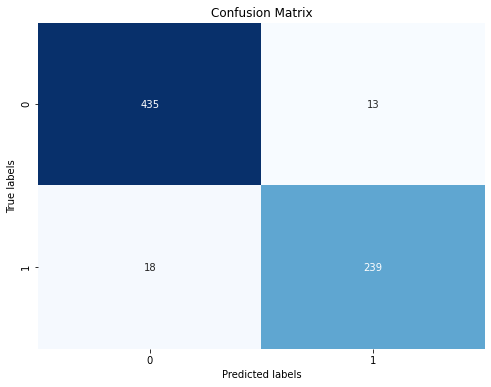

In [34]:
y_pred = fnn_model.predict(x_test)
y_pred = np.round(y_pred).astype(int)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
    
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

##### CONVOLUTIONAL NEURAL NETWORK - CNN

In [35]:
NUM_EPOCHS = 10
BATCH_SIZE = 32  
NUM_FEATURES = x_train.shape[1]
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Reshape((NUM_FEATURES, 1), input_shape=(NUM_FEATURES,)),  # Add a reshape layer to match the input shape
    tf.keras.layers.Conv1D(64, 3, activation='relu'),  # Convolutional layer with 64 filters and kernel size 3
    tf.keras.layers.MaxPooling1D(2),  # Max pooling layer with pool size 2 
    tf.keras.layers.Flatten(),  # Flatten layer to convert output to 1D 
    tf.keras.layers.Dense(64, activation='relu'),  # Dense hidden layer with 64 units and ReLU activation
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
cnn_model.fit(x_train, y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1)
accuracy, precision, recall, f1 = evaluate_model(cnn_model, x_test, y_test)

Epoch 1/10
80/80 [==============================] - 2s 7ms/step - loss: 1.0766 - accuracy: 0.6091 - val_loss: 0.4275 - val_accuracy: 0.8546
Epoch 2/10
80/80 [==============================] - 0s 4ms/step - loss: 0.3352 - accuracy: 0.8932 - val_loss: 0.3038 - val_accuracy: 0.8830
Epoch 3/10
80/80 [==============================] - 0s 4ms/step - loss: 0.2528 - accuracy: 0.9161 - val_loss: 0.2423 - val_accuracy: 0.9149
Epoch 4/10
80/80 [==============================] - 0s 4ms/step - loss: 0.2059 - accuracy: 0.9346 - val_loss: 0.2150 - val_accuracy: 0.9184
Epoch 5/10
80/80 [==============================] - 0s 4ms/step - loss: 0.1939 - accuracy: 0.9310 - val_loss: 0.1985 - val_accuracy: 0.9326
Epoch 6/10
80/80 [==============================] - 0s 5ms/step - loss: 0.1884 - accuracy: 0.9370 - val_loss: 0.2101 - val_accuracy: 0.9468
Epoch 7/10
80/80 [==============================] - 0s 5ms/step - loss: 0.1739 - accuracy: 0.9456 - val_loss: 0.2045 - val_accuracy: 0.9504
Epoch 8/10
80/80 [==

In [37]:
print("CNN MODEL: \n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

CNN MODEL: 

Accuracy: 0.9546099290780142
Precision: 0.9591836734693877
Recall: 0.914396887159533
F1 Score: 0.9362549800796813


23/23 [==============================] - 0s 2ms/step


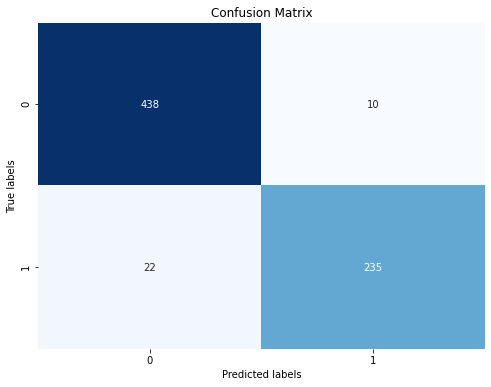

In [38]:
y_pred = cnn_model.predict(x_test)
y_pred = np.round(y_pred).astype(int)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
    
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

##### RECURRENT NEURAL NETWORK - RNN

In [39]:
X_train_reshaped = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
X_test_reshaped = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

In [40]:
rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(1, NUM_FEATURES)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
rnn_model.fit(X_train_reshaped, y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1)
accuracy, precision, recall, f1 = evaluate_model(rnn_model, X_test_reshaped, y_test)

Epoch 1/10
80/80 [==============================] - 3s 8ms/step - loss: 0.5872 - accuracy: 0.6879 - val_loss: 0.4906 - val_accuracy: 0.7553
Epoch 2/10
80/80 [==============================] - 0s 4ms/step - loss: 0.3772 - accuracy: 0.8861 - val_loss: 0.3255 - val_accuracy: 0.9078
Epoch 3/10
80/80 [==============================] - 0s 3ms/step - loss: 0.2588 - accuracy: 0.9251 - val_loss: 0.2681 - val_accuracy: 0.9043
Epoch 4/10
80/80 [==============================] - 0s 4ms/step - loss: 0.2148 - accuracy: 0.9279 - val_loss: 0.2450 - val_accuracy: 0.9113
Epoch 5/10
80/80 [==============================] - 0s 4ms/step - loss: 0.1951 - accuracy: 0.9330 - val_loss: 0.2270 - val_accuracy: 0.9043
Epoch 6/10
80/80 [==============================] - 0s 4ms/step - loss: 0.1763 - accuracy: 0.9385 - val_loss: 0.2077 - val_accuracy: 0.9113
Epoch 7/10
80/80 [==============================] - 0s 4ms/step - loss: 0.1638 - accuracy: 0.9472 - val_loss: 0.1994 - val_accuracy: 0.9291
Epoch 8/10
80/80 [==

In [42]:
print("RNN MODEL: \n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

RNN MODEL: 

Accuracy: 0.9546099290780142
Precision: 0.9518072289156626
Recall: 0.9221789883268483
F1 Score: 0.9367588932806324


23/23 [==============================] - 0s 3ms/step


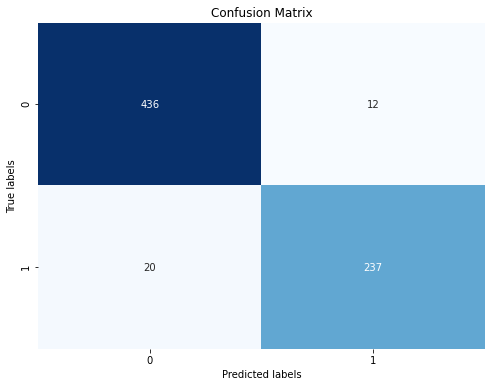

In [43]:
y_pred = rnn_model.predict(X_test_reshaped)
y_pred = np.round(y_pred).astype(int)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
    
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

##### HYBRID MODEL - CNN & RNN

In [44]:
# Define the input shapes for CNN and RNN branches
cnn_input_shape = (x_train.shape[1], 1)
rnn_input_shape = (x_train.shape[1],)

# CNN branch
cnn_input = Input(shape=cnn_input_shape)
cnn_layer = Conv1D(filters=64, kernel_size=3, activation='relu')(cnn_input)
cnn_layer = MaxPooling1D(pool_size=2)(cnn_layer)
cnn_layer = Conv1D(filters=64, kernel_size=3, activation='relu')(cnn_layer)
cnn_layer = MaxPooling1D(pool_size=2)(cnn_layer) 
cnn_layer = Flatten()(cnn_layer)
cnn_layer = Dropout(0.6)(cnn_layer)  # Increased dropout rate

# RNN branch
rnn_input = Input(shape=rnn_input_shape)
rnn_layer = tf.keras.layers.Reshape((1, rnn_input_shape[0]))(rnn_input)  # Reshape for RNN compatibility
rnn_layer = LSTM(128, return_sequences=True)(rnn_layer)
rnn_layer = LSTM(64, return_sequences=True)(rnn_layer)
rnn_layer = LSTM(32, return_sequences=True)(rnn_layer)  # Additional LSTM layer
rnn_layer = LSTM(16)(rnn_layer)  # Additional LSTM layer
rnn_layer = Dropout(0.6)(rnn_layer)  # Increased dropout rate

# Concatenate CNN and RNN branches
concatenated = Concatenate()([cnn_layer, rnn_layer])

# Fully connected layer with L2 regularization
output = Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01))(concatenated)

# Create the hybrid model
hybrid_model = Model(inputs=[cnn_input, rnn_input], outputs=output)

In [45]:
# Compile the model with RMSprop optimizer and adjusted learning rate
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
hybrid_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
# Learning rate scheduling
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.01)

In [47]:
# Train the model with early stopping and learning rate reduction
hybrid_model.fit([x_train, x_train], y_train, epochs=50, batch_size=64, validation_split=0.35,
                            callbacks=[reduce_lr, EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/50
29/29 [==============================] - 12s 89ms/step - loss: 2.8983 - accuracy: 0.5701 - val_loss: 0.6848 - val_accuracy: 0.6170 - lr: 0.0100
Epoch 2/50
29/29 [==============================] - 0s 15ms/step - loss: 0.6878 - accuracy: 0.5979 - val_loss: 0.6759 - val_accuracy: 0.6170 - lr: 0.0100
Epoch 3/50
29/29 [==============================] - 0s 16ms/step - loss: 0.7351 - accuracy: 0.5881 - val_loss: 0.6740 - val_accuracy: 0.6170 - lr: 0.0100
Epoch 4/50
29/29 [==============================] - 0s 16ms/step - loss: 0.6745 - accuracy: 0.6241 - val_loss: 0.5473 - val_accuracy: 0.8967 - lr: 0.0100
Epoch 5/50
29/29 [==============================] - 0s 14ms/step - loss: 0.5368 - accuracy: 0.7338 - val_loss: 0.3046 - val_accuracy: 0.9078 - lr: 0.0100
Epoch 6/50
29/29 [==============================] - 0s 16ms/step - loss: 0.3775 - accuracy: 0.8391 - val_loss: 0.3193 - val_accuracy: 0.8592 - lr: 0.0100
Epoch 7/50
29/29 [==============================] - 0s 16ms/step - loss: 0.

In [48]:
# Evaluation
def evaluate_model(model, X_test, y_test):
    # Predict on test data
    y_pred = model.predict([X_test, X_test])
    y_pred = np.round(y_pred).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate precision
    precision = precision_score(y_test, y_pred)
    
    # Calculate recall
    recall = recall_score(y_test, y_pred)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, recall, f1

In [49]:
# Evaluate the model
accuracy, precision, recall, f1 = evaluate_model(hybrid_model, x_test, y_test)

23/23 [==============================] - 3s 4ms/step


In [50]:
print("HYBRID MODEL: \n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

HYBRID MODEL: 

Accuracy: 0.9659574468085106
Precision: 0.9568627450980393
Recall: 0.9494163424124513
F1 Score: 0.953125


23/23 [==============================] - 0s 6ms/step


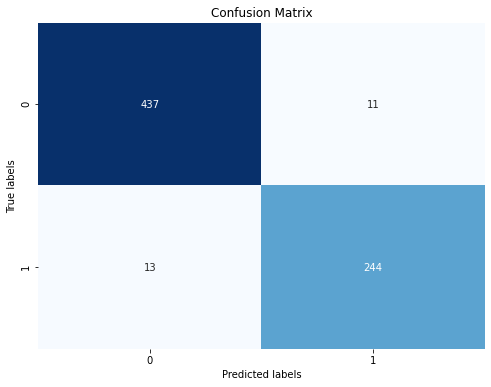

In [51]:
y_pred = hybrid_model.predict([x_test, x_test])
y_pred = np.round(y_pred).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
    
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [52]:
from joblib import dump

# Save the hybrid model
dump(hybrid_model, 'hybrid_model.pkl')

['hybrid_model.pkl']